# Zadatak 1
U prilogu vježbe nalazi se skripta 7.1. koja učitava MNIST skup podataka. Dopunite skriptu na odgovarajućim mjestima:


---


1) Prikažite nekoliko slika iz skupa podataka (npr. pomoću matplotlib biblioteke). 


---


2) Izgradite i trenirajte model potpuno povezane neuronske mreže pomoću Keras
API.
https://keras.io/guides/sequential_model/


---


3) Izračunajte točnost izgrađene mreže na skupu podataka za učenje i skupu podataka za testiranje.


---


4) Prikažite matricu zabune na skupu podataka za učenje i na skupu podataka za testiranje. Komentirajte dobivene 
rezultate.


---


5) Spremite model na disk.
https://keras.io/guides/serialization_and_saving/


---


6) Ponovite korake 2) do 5), ali izgradite i naučite konvolucijsku neuronsku mrežu. Usporedite rezultate koje ste 
dobili s potpuno povezanom mrežom s rezultatima koje postiže konvolucijska neuronska mreža na testnom 
skupu.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


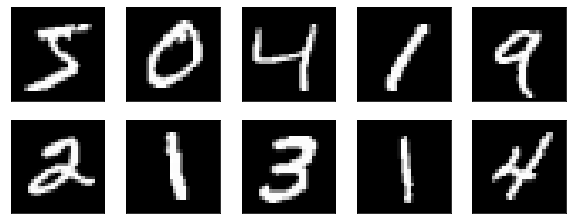

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2182 - accuracy: 0.9324
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0858 - accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0651 - accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0574 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0496 - accuracy: 0.9846
Sequential Test loss: 0.0317285992205143
Sequential Test accuracy: 0.9883000254631042
Sequential Train loss: 0.0291751716285944
Sequential Train accuracy: 0.9909666776657104
313/313 [==============================] - 3s 10ms/step
[[ 976    0    1    0    0    0    1    1    1    0]
 [   1 1131    2    1    0    0    0    0    0    0]
 [   4    1 1019    1    0    0    0    7    0    0]
 [   1    0    1 1001  

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)


# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


# TODO: definiraj karakteristike procesa ucenja pomocu .compile()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# TODO: provedi ucenje mreze

model.fit(x_train_s, y_train_s, epochs=5, batch_size=32)

# TODO: Prikazi test accuracy i matricu zabune

scoreTest = model.evaluate(x_test_s, y_test_s, verbose=0)
print('Sequential Test loss:', scoreTest[0])
print('Sequential Test accuracy:', scoreTest[1])
scoreTrain = model.evaluate(x_train_s, y_train_s, verbose=0)
print('Sequential Train loss:', scoreTrain[0])
print('Sequential Train accuracy:', scoreTrain[1])

classes = model.predict(x_test_s, batch_size=32)
y_pred = (classes > 0.5)



# TODO: spremi model

model.save('model')
